In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Desktop\\Edtech Capstone Project BI\\online_All_Business_p1_p626.csv')

In [3]:
df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640,INR,"₹8,640"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

3 columns with null values

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9447.0,1.456603e+06,895660.094130,2762.0,673031.00000,1.381806e+06,2.154793e+06,3469452.0
num_subscribers,9447.0,3.399298e+03,10451.534122,3.0,141.00000,9.160000e+02,2.889500e+03,374836.0
avg_rating,9447.0,4.138522e+00,0.453581,1.0,3.90000,4.200000e+00,4.450000e+00,5.0
avg_rating_recent,9447.0,4.124756e+00,0.478410,1.0,3.87941,4.206080e+00,4.447495e+00,5.0
rating,9447.0,4.124756e+00,0.478410,1.0,3.87941,4.206080e+00,4.447495e+00,5.0
num_reviews,9447.0,2.990545e+02,1826.867472,3.0,12.00000,3.300000e+01,1.100000e+02,78006.0
num_published_lectures,9447.0,3.440087e+01,46.061088,0.0,13.00000,2.300000e+01,3.900000e+01,699.0
num_published_practice_tests,9447.0,1.018313e-01,0.580037,0.0,0.00000,0.000000e+00,0.000000e+00,6.0
discount_price__amount,8937.0,4.889841e+02,247.833161,455.0,455.00000,4.550000e+02,4.550000e+02,3200.0
price_detail__amount,9447.0,4.828758e+03,3108.307674,1280.0,1600.00000,3.840000e+03,8.640000e+03,12800.0


In [6]:
# check for unique values in non-relevant columns
df['price_detail__currency'].value_counts()

INR    9447
Name: price_detail__currency, dtype: int64

In [7]:
df['discount_price__currency'].value_counts()

INR    8937
Name: discount_price__currency, dtype: int64

In [8]:
df['is_paid'].value_counts()

True    9447
Name: is_paid, dtype: int64

In [37]:
df['is_wishlisted'].value_counts()

False    8937
Name: is_wishlisted, dtype: int64

**There is only one type of currency so its not important for us.**

In [38]:
# drop unnecessary columns

df.drop(['price_detail__currency','discount_price__currency','discount_price__price_string','price_detail__price_string','rating'],axis=1,inplace=True)

KeyError: "['price_detail__currency', 'discount_price__currency', 'discount_price__price_string', 'price_detail__price_string', 'rating'] not found in axis"

In [39]:
# convert strings to timestamp

df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])

In [40]:
# get published year for yearly analysis

df['published_year'] = df['published_time'].dt.year
df['published_month'] = df['published_time'].dt.month

In [41]:
# check for duplicate course entries
# df[df['url'].duplicated() == True].value_counts()

df['url'].nunique()

8937

**Title could have been same but different url,  won't consider them duplicates.**

In [42]:
# check for null values

df.isnull().sum()

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
published_year                  0
published_month                 0
discount_perc                   0
sales                           0
dtype: int64

**510 null values in sngle column.
checking percentage of null values then deciding what to do with them.**

In [43]:
df['discount_price__amount'].isnull().sum()/9447*100

0.0

**There are almost 6% null values in particular column.
So either we can drop those 6% rows or we can try to fill with 0/mean/mode/median.
I'll be trying three different approaches at same time.**

In [44]:
# lets try replacing null values with 0 and mean separately

new1 = df.fillna(0)
new2 = df.fillna(df['discount_price__amount'].mean())

In [45]:
#dropped rows with null values

df = df.dropna()

In [18]:
for i in [df,new1,new2]:
  # adding new column named discount_perc
  i['discount_perc']=i['discount_price__amount']/i['price_detail__amount']*100

  #check for avg 
  print("avg_discounted_amount : {}".format(i['discount_price__amount'].mean()))

avg_discounted_amount : 488.98411099921674
avg_discounted_amount : 462.58611199322536
avg_discounted_amount : 488.98411099921793


**After replacing null values with 0 mean of the data fluctuated by just less than 6%, so that is not bad. **

**Lets see how different are the other outcomes**

**Let's check for correlation between continuous features**

In [19]:
continuous_features = [feature for feature in df.columns if df[feature].dtypes in ['int64','float'] and feature != 'id']
continuous_features

['num_subscribers',
 'avg_rating',
 'avg_rating_recent',
 'num_reviews',
 'num_published_lectures',
 'num_published_practice_tests',
 'discount_price__amount',
 'price_detail__amount',
 'published_year',
 'published_month',
 'discount_perc']

In [1]:
for x in [df,new1,new2]:
  df1 = x[continuous_features]
  plt.figure(figsize=(12,4))
  sns.heatmap(data=df1.corr(),cmap="YlGnBu", annot=True)
  plt.show()

NameError: name 'df' is not defined

**Each correlation matrix is almost similar and there is no strong correlation between any of the features apart from no. of subscribers and no. of reviews.**

**Checking if other results would vary or not for these three datasets.**

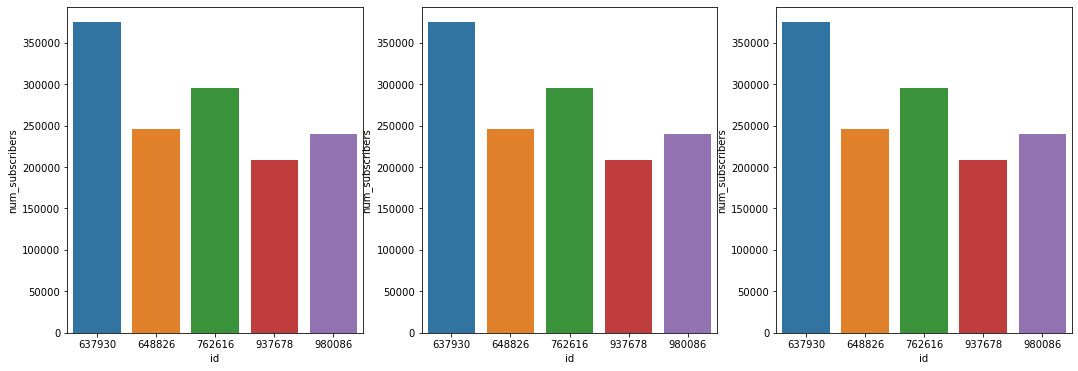

In [21]:
# Check for most subscribed course

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.barplot(ax=axes[0],data=df, x=df.nlargest(5,'num_subscribers')['id'], y=df.nlargest(5,'num_subscribers')['num_subscribers'])

sns.barplot(ax=axes[1],data=new1, x=new1.nlargest(5,'num_subscribers')['id'], y=new1.nlargest(5,'num_subscribers')['num_subscribers'])

sns.barplot(ax=axes[2],data=new2, x=new2.nlargest(5,'num_subscribers')['id'], y=new2.nlargest(5,'num_subscribers')['num_subscribers'])

plt.show()

***All results are same and the most subscribed course has id 637930***

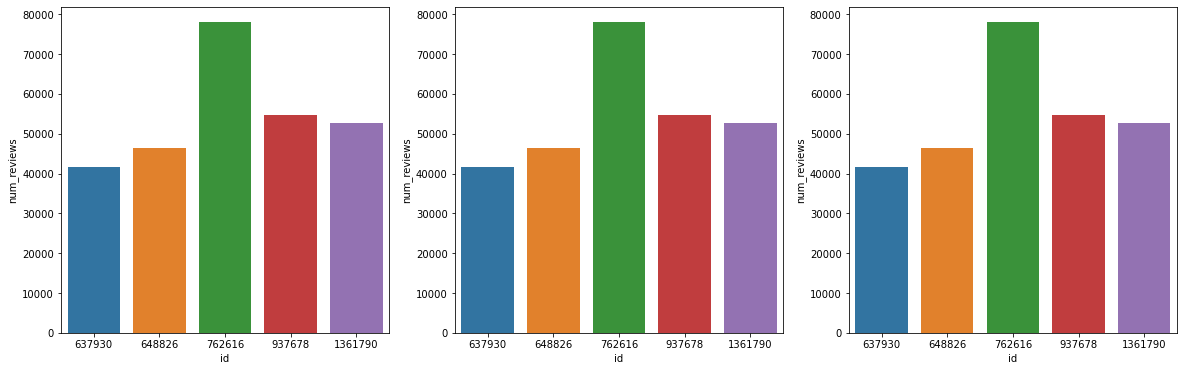

In [22]:
# most reviewed course
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

sns.barplot(ax=axes[0],data=df, x=df.nlargest(5,'num_reviews')['id'], y=df.nlargest(5,'num_reviews')['num_reviews'])

sns.barplot(ax=axes[1],data=new1, x=new1.nlargest(5,'num_reviews')['id'], y=new1.nlargest(5,'num_reviews')['num_reviews'])

sns.barplot(ax=axes[2],data=new2, x=new2.nlargest(5,'num_reviews')['id'], y=new2.nlargest(5,'num_reviews')['num_reviews'])

plt.show()

***Again the results of all three datasets are same, and the most reviewed course has id 762616.
Also there were 4 exact same entries to what we saw in most subscribed courses, as it was clear from correlation heatmap.***

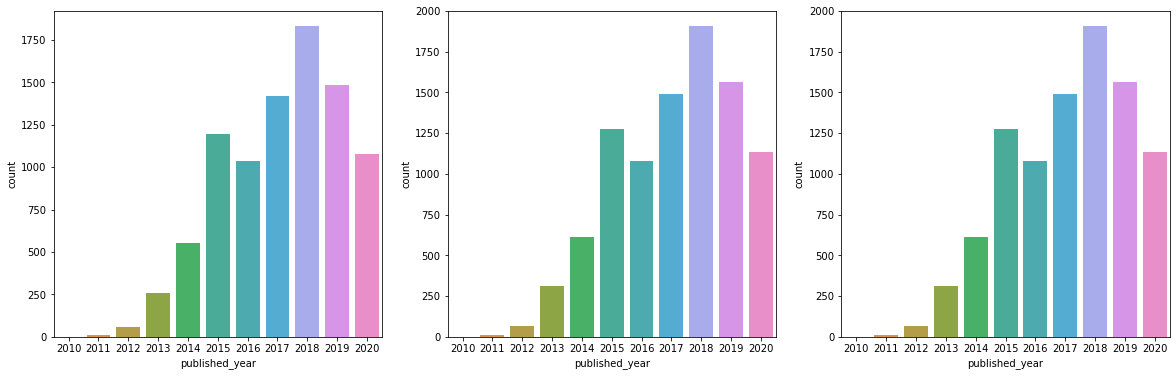

In [23]:
#yearly growth of platform

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

sns.countplot(ax=axes[0],data=df, x='published_year')

sns.countplot(ax=axes[1],data=new1, x='published_year')

sns.countplot(ax=axes[2],data=new2, x='published_year')
plt.show()


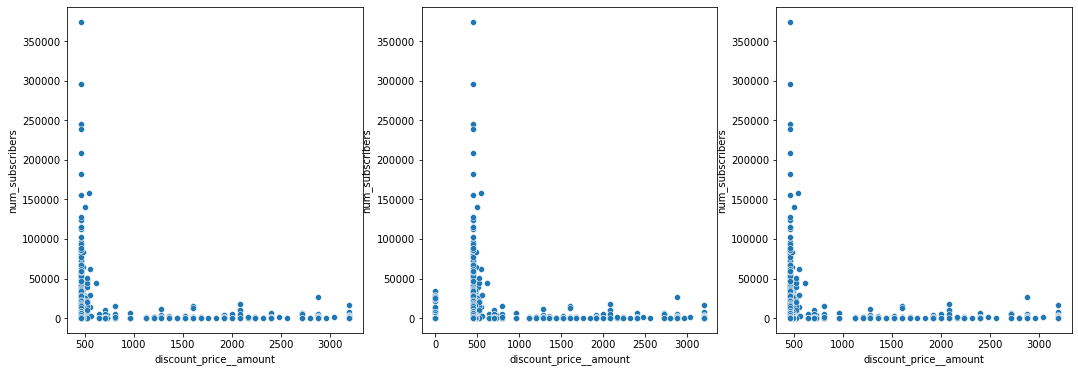

In [24]:
fig,axes = plt.subplots(1,3,figsize=(18,6))

sns.scatterplot(ax=axes[0],x=df['discount_price__amount'],y=df['num_subscribers'])

sns.scatterplot(ax=axes[1],x=new1['discount_price__amount'],y=new1['num_subscribers'])

sns.scatterplot(ax=axes[2],x=new2['discount_price__amount'],y=new2['num_subscribers'])

plt.show()

**It is clear that the rows containing null values were not affecting our data that much so we can drop them.**

In [25]:
# adding new column for total sales
df['sales'] = df['num_subscribers']*df['discount_price__amount']

In [26]:
df[df['id'].isin([637930,648826,762616,937678])]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,published_year,published_month,discount_perc,sales
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640,2016,4,5.266204,134456595.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640,2016,8,5.266204,95126850.0
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,46447,False,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48+00:00,455.0,8640,2016,1,5.266204,111866300.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,41630,False,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33+00:00,455.0,8640,2016,1,5.266204,170550380.0


<AxesSubplot:xlabel='num_published_lectures'>

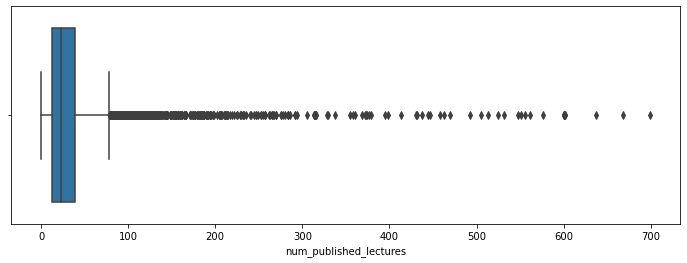

In [27]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x='num_published_lectures')

**There can be seen far too many outliers. The third quartile value for published lectures is 39. Lets check other 25% data.**

In [28]:
df[df['num_published_lectures']>39].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2187.0,1.432712e+06,8.898194e+05,8075.000000,658917.000000,1.354030e+06,2.141789e+06,3.465034e+06
num_subscribers,2187.0,6.852308e+03,1.928104e+04,5.000000,383.500000,1.727000e+03,5.504000e+03,3.748360e+05
avg_rating,2187.0,4.233869e+00,3.944101e-01,2.050000,4.050000,4.321430e+00,4.500000e+00,5.000000e+00
avg_rating_recent,2187.0,4.220092e+00,4.159612e-01,1.234940,4.032005,4.307010e+00,4.501085e+00,5.000000e+00
num_reviews,2187.0,7.677846e+02,3.533723e+03,3.000000,22.000000,7.700000e+01,3.545000e+02,7.800600e+04
num_published_lectures,2187.0,8.195382e+01,7.235996e+01,40.000000,47.000000,5.900000e+01,8.500000e+01,6.990000e+02
num_published_practice_tests,2187.0,5.212620e-02,2.805510e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000e+00
discount_price__amount,2187.0,4.986589e+02,2.941672e+02,455.000000,455.000000,4.550000e+02,4.550000e+02,3.200000e+03
price_detail__amount,2187.0,6.185350e+03,2.932057e+03,1280.000000,3200.000000,8.320000e+03,8.640000e+03,1.152000e+04
published_year,2187.0,2.017116e+03,1.954858e+00,2011.000000,2016.000000,2.017000e+03,2.019000e+03,2.020000e+03


In [29]:
df[df['num_published_lectures']>39].head(10).sort_values(by=['avg_rating','num_reviews'],ascending=False).head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,published_year,published_month,discount_perc,sales
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640,2016,4,5.266204,134456595.0
10,1570206,Microsoft Power BI - Up & Running With Power B...,/course/microsoft-power-bi-up-running-with-pow...,True,86715,4.61951,4.63301,23580,False,117,0,2018-02-25 19:08:58+00:00,2018-04-26 17:06:36+00:00,455.0,8640,2018,4,5.266204,39455325.0


**It is evident that this data is significant for dataset as all the average value has seen significant jump. So we can conclude from this that there should be atleast 39 lectures.**

In [30]:
new3 = df.groupby('num_published_practice_tests')[['num_subscribers','avg_rating']].mean().reset_index()

In [31]:
new3

,num_published_practice_tests,num_subscribers,avg_rating
0,0,3559.618273,4.136555
1,1,2470.500000,4.105686
2,2,2984.730769,4.037462
3,3,744.214286,3.861100
4,4,897.266667,3.867778
5,5,1203.240000,3.716561
6,6,1005.312500,4.042586


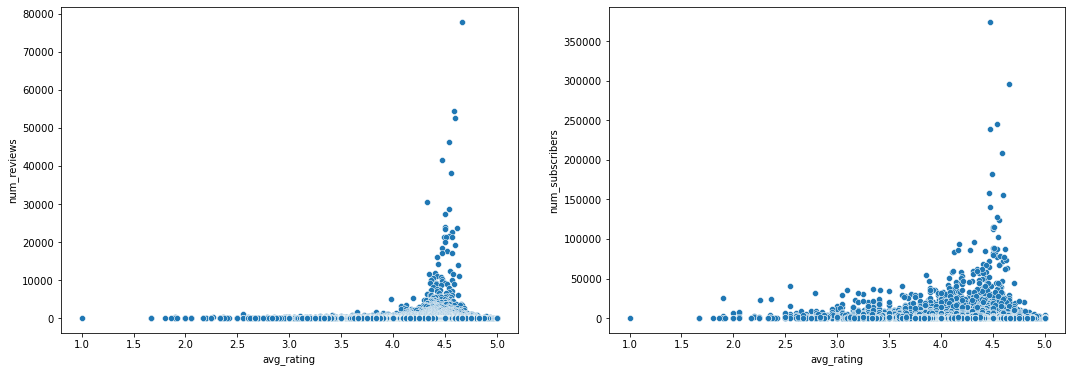

In [32]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
sns.scatterplot(ax=axes[0],data=df,x=df['avg_rating'],y=df['num_reviews'])
sns.scatterplot(ax=axes[1],data=df,x=df['avg_rating'],y=df['num_subscribers'])
plt.show()

***No. of subscriptions, most reviews,avg rating above 4.2, 0-2 published practice tests, above 40 published lectures, and discount price close to 500.***

In [33]:
df[['created','published_time']] = df[['created','published_time']].astype(str)

In [34]:
df.head(2)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,published_year,published_month,discount_perc,sales
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,78006,False,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11+00:00,455.0,8640,2016,4,5.266204,134456595.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,54581,False,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49+00:00,455.0,8640,2016,8,5.266204,95126850.0


In [35]:
df.to_excel('/content/online_All_Business_p1_p626new.xlsx',index=False)

OSError: Cannot save file into a non-existent directory: '\content'